In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/Arkadium98/Gasolina-CDMX/main/db_gas/places.csv'
df_places = pd.read_csv(path, index_col=0, sep=';', encoding='latin-1')
# Redefine índice por defecto en dataframe df --> NO devuelve nada nuevo
df_places.reset_index(inplace=True)
# Imprime información de dataframe df
df_places.head()

,name,cre_id,x,y,place_id
0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039
1,"LAS MEJORES ESTACIONES, S.A DE C.V",PL/902/EXP/ES/2015,-99.74484,20.30370,2040
2,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041
3,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042
4,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043


In [3]:
path2 = 'https://raw.githubusercontent.com/Arkadium98/Gasolina-CDMX/main/db_gas/prices.csv'
df_prices = pd.read_csv(path2, index_col=0, sep=';', encoding='latin-1')
# Redefine índice por defecto en dataframe df --> NO devuelve nada nuevo
df_prices.reset_index(inplace=True)
# Imprime información de dataframe df
df_prices.head()

,gas_price,gas_type,place_id
0,21.89,regular,11703
1,23.89,premium,11703
2,21.37,regular,11702
3,23.39,premium,11702
4,22.89,diesel,11702


In [4]:
# Une dataframe df_places y dataframe df_prices
df_gas = pd.merge(df_places, df_prices)  # inner join
df_gas

,name,cre_id,x,y,place_id,gas_price,gas_type
0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,21.99,diesel
1,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,20.99,regular
2,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,23.99,premium
3,"LAS MEJORES ESTACIONES, S.A DE C.V",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,21.11,regular
4,"LAS MEJORES ESTACIONES, S.A DE C.V",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,22.65,diesel
...,...,...,...,...,...,...,...
33893,"SERVI FER, S.A. DE C.V.",PL/23917/EXP/ES/2021,-98.97183,19.73870,27707,20.89,regular
33894,"SERVI FER, S.A. DE C.V.",PL/23917/EXP/ES/2021,-98.97183,19.73870,27707,22.47,premium
33895,"SERVI FER, S.A. DE C.V.",PL/23917/EXP/ES/2021,-98.97183,19.73870,27707,21.89,diesel
33896,"SERVICIO EXPRESS HIDALGO, S.A. DE C.V.",PL/23918/EXP/ES/2021,-100.17010,25.69405,27708,22.84,regular


In [5]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
#!pip install --upgrade geopandas plotly
import geopandas as gpd
import plotly.express as px
import folium
from shapely.geometry import Point
from shapely.geometry import shape
from shapely.geometry import Polygon
import contextily as cx
from geopandas.tools import sjoin

In [6]:
df_gas = gpd.GeoDataFrame(
    df_gas, geometry= gpd.points_from_xy(df_gas.x, df_gas.y), crs='EPSG:4326') # y x --> x, y

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
states = gpd.read_file('mapa_mexico/Division_Municipal_Mexico_2010.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

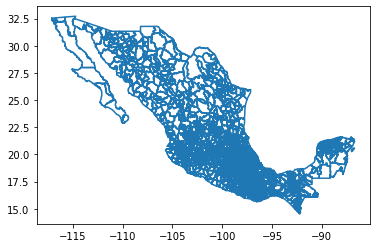

In [9]:
states.boundary.plot()

In [10]:
gdf_gas = states.sjoin(df_gas, how="inner")
gdf_gas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33766 entries, 0 to 2479
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CLAVE        33766 non-null  object  
 1   NOM_MUN      33766 non-null  object  
 2   NOMEDO       33766 non-null  object  
 3   CVE_EDO      33766 non-null  object  
 4   CVE_MUNI     33766 non-null  object  
 5   Area         33766 non-null  float64 
 6   geometry     33766 non-null  geometry
 7   index_right  33766 non-null  int64   
 8   name         33766 non-null  object  
 9   cre_id       33766 non-null  object  
 10  x            33766 non-null  float64 
 11  y            33766 non-null  float64 
 12  place_id     33766 non-null  int64   
 13  gas_price    33766 non-null  float64 
 14  gas_type     33766 non-null  object  
dtypes: float64(4), geometry(1), int64(2), object(8)
memory usage: 4.1+ MB


In [11]:
#--------------------------Base de Datos INEGI----------------------------
path3 = 'db_inegi/conjunto_de_datos_inegi_2020.csv'
df_inegi = pd.read_csv(path3, index_col=0, sep=',') # encoding='latin-1'

C:\Users\odie2\AppData\Local\Temp\ipykernel_23560\1417978148.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inegi = pd.read_csv(path3, index_col=0, sep=',') # encoding='latin-1'


In [12]:
df_inegi = df_inegi.dropna(how='any')

In [13]:
df_inegi.reset_index(inplace=True)

In [14]:
df_LAT_LON = df_inegi.loc[:, ['LATITUD', 'LONGITUD']]

In [15]:
array_LAT = df_inegi[['LATITUD']].to_numpy()# df_inegi.LATITUD
array_LON = df_inegi[['LONGITUD']].to_numpy()# df_inegi.LATITUD

In [16]:
import re
def coord_degree_to_decimal(arr):
    new_arr = np.array([])
    for coord in arr:
        coord_degree = re.split('[°\'"]+', str(coord))
        sign = -1 if re.search('[swSW]', coord_degree[-2]) else 1
        degree = coord_degree[1]
        temp_minute = coord_degree[2]
        minute = temp_minute[:2]
        second = coord_degree[3]
        final_coord = sign*(int(degree) + float(minute) / 60 + float(second) / 3600)
        new_arr = np.append(new_arr, final_coord) 
    return new_arr

In [17]:
new_array_LAT = coord_degree_to_decimal(array_LAT)
new_array_LON = coord_degree_to_decimal(array_LON)
new_array_LON

array([-102.29604667, -102.37353056, -102.35712194, ..., -103.33726778,
       -103.33593222, -103.37225944])

In [18]:
df_LAT_LON['NEW_LAT'] = new_array_LAT.tolist()
df_LAT_LON['NEW_LON'] = new_array_LON.tolist()
df_LAT_LON.head() # 21.879823, -102.296047  --> df_LAT_LON

,LATITUD,LONGITUD,NEW_LAT,NEW_LON
0,"21°52'47.362"" N","102°17'45.768"" W",21.879823,-102.296047
1,"21°52'18.749"" N","102°22'24.710"" W",21.871875,-102.373531
2,"21°53'01.522"" N","102°21'25.639"" W",21.883756,-102.357122
3,"21°46'48.650"" N","102°21'26.261"" W",21.780181,-102.357295
4,"21°56'42.243"" N","102°11'30.914"" W",21.945068,-102.191921


In [19]:
df_inegi = gpd.GeoDataFrame(
    df_inegi, geometry= gpd.points_from_xy(df_LAT_LON.NEW_LON, df_LAT_LON.NEW_LAT), crs='EPSG:4326') # y x --> x, y

In [20]:
df_inegi.rename(columns = {'NOM_ENT':'d_estado', 'NOM_MUN':'D_mnpio'}, inplace = True)
df_inegi.head()

,ENTIDAD,d_estado,MUN,D_mnpio,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,geometry
0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",1878,863893,...,169675,123670,77719,53589,2995,5984,63661,595,13,POINT (-102.29605 21.87982)
1,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102°22'24.710"" W","21°52'18.749"" N",1902,5,...,*,*,*,*,*,*,*,*,1,POINT (-102.37353 21.87187)
2,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102°21'25.639"" W","21°53'01.522"" N",1861,41,...,4,5,2,1,0,1,6,0,1,POINT (-102.35712 21.88376)
3,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"102°21'26.261"" W","21°46'48.650"" N",1861,8,...,*,*,*,*,*,*,*,*,1,POINT (-102.35729 21.78018)
4,1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),"102°11'30.914"" W","21°56'42.243"" N",1989,1,...,*,*,*,*,*,*,*,*,1,POINT (-102.19192 21.94507)


In [21]:
gdf_inegi = states.sjoin(df_inegi, how="inner")
gdf_inegi.drop("index_right", axis=1, inplace=True)
gdf_gas.drop("index_right", axis=1, inplace=True)
gdf_inegi = gdf_inegi.replace(to_replace='None', value=np.nan).dropna()


In [22]:
arr_string = "POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC"
arr = arr_string.split(",")
#for colu in arr:
    #print("gdf_inegi.loc[gdf_inegi."+colu+" == '*', '"+colu+"'] = '0'")
    #print("gdf_inegi.loc[gdf_inegi."+colu+" == 'N/D', '"+colu+"'] = '0'")

#for colu in arr:
    #print("gdf_inegi = gdf_inegi.astype({'"+colu+"': 'float64'})")

In [23]:
gdf_inegi.loc[gdf_inegi.POBFEM == '*', 'POBFEM'] = '0'
gdf_inegi.loc[gdf_inegi.POBFEM == 'N/D', 'POBFEM'] = '0'
gdf_inegi.loc[gdf_inegi.POBMAS == '*', 'POBMAS'] = '0'
gdf_inegi.loc[gdf_inegi.POBMAS == 'N/D', 'POBMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_0A2 == '*', 'P_0A2'] = '0'
gdf_inegi.loc[gdf_inegi.P_0A2 == 'N/D', 'P_0A2'] = '0'
gdf_inegi.loc[gdf_inegi.P_0A2_F == '*', 'P_0A2_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_0A2_F == 'N/D', 'P_0A2_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_0A2_M == '*', 'P_0A2_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_0A2_M == 'N/D', 'P_0A2_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_3YMAS == '*', 'P_3YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_3YMAS == 'N/D', 'P_3YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_3YMAS_F == '*', 'P_3YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_3YMAS_F == 'N/D', 'P_3YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_3YMAS_M == '*', 'P_3YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_3YMAS_M == 'N/D', 'P_3YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_5YMAS == '*', 'P_5YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_5YMAS == 'N/D', 'P_5YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_5YMAS_F == '*', 'P_5YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_5YMAS_F == 'N/D', 'P_5YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_5YMAS_M == '*', 'P_5YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_5YMAS_M == 'N/D', 'P_5YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_12YMAS == '*', 'P_12YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_12YMAS == 'N/D', 'P_12YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_12YMAS_F == '*', 'P_12YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_12YMAS_F == 'N/D', 'P_12YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_12YMAS_M == '*', 'P_12YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_12YMAS_M == 'N/D', 'P_12YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_15YMAS == '*', 'P_15YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_15YMAS == 'N/D', 'P_15YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_15YMAS_F == '*', 'P_15YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_15YMAS_F == 'N/D', 'P_15YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_15YMAS_M == '*', 'P_15YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_15YMAS_M == 'N/D', 'P_15YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_18YMAS == '*', 'P_18YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_18YMAS == 'N/D', 'P_18YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_18YMAS_F == '*', 'P_18YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_18YMAS_F == 'N/D', 'P_18YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_18YMAS_M == '*', 'P_18YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_18YMAS_M == 'N/D', 'P_18YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_3A5 == '*', 'P_3A5'] = '0'
gdf_inegi.loc[gdf_inegi.P_3A5 == 'N/D', 'P_3A5'] = '0'
gdf_inegi.loc[gdf_inegi.P_3A5_F == '*', 'P_3A5_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_3A5_F == 'N/D', 'P_3A5_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_3A5_M == '*', 'P_3A5_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_3A5_M == 'N/D', 'P_3A5_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_6A11 == '*', 'P_6A11'] = '0'
gdf_inegi.loc[gdf_inegi.P_6A11 == 'N/D', 'P_6A11'] = '0'
gdf_inegi.loc[gdf_inegi.P_6A11_F == '*', 'P_6A11_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_6A11_F == 'N/D', 'P_6A11_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_6A11_M == '*', 'P_6A11_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_6A11_M == 'N/D', 'P_6A11_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_8A14 == '*', 'P_8A14'] = '0'
gdf_inegi.loc[gdf_inegi.P_8A14 == 'N/D', 'P_8A14'] = '0'
gdf_inegi.loc[gdf_inegi.P_8A14_F == '*', 'P_8A14_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_8A14_F == 'N/D', 'P_8A14_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_8A14_M == '*', 'P_8A14_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_8A14_M == 'N/D', 'P_8A14_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_12A14 == '*', 'P_12A14'] = '0'
gdf_inegi.loc[gdf_inegi.P_12A14 == 'N/D', 'P_12A14'] = '0'
gdf_inegi.loc[gdf_inegi.P_12A14_F == '*', 'P_12A14_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_12A14_F == 'N/D', 'P_12A14_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_12A14_M == '*', 'P_12A14_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_12A14_M == 'N/D', 'P_12A14_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A17 == '*', 'P_15A17'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A17 == 'N/D', 'P_15A17'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A17_F == '*', 'P_15A17_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A17_F == 'N/D', 'P_15A17_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A17_M == '*', 'P_15A17_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A17_M == 'N/D', 'P_15A17_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_18A24 == '*', 'P_18A24'] = '0'
gdf_inegi.loc[gdf_inegi.P_18A24 == 'N/D', 'P_18A24'] = '0'
gdf_inegi.loc[gdf_inegi.P_18A24_F == '*', 'P_18A24_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_18A24_F == 'N/D', 'P_18A24_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_18A24_M == '*', 'P_18A24_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_18A24_M == 'N/D', 'P_18A24_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A49_F == '*', 'P_15A49_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_15A49_F == 'N/D', 'P_15A49_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_60YMAS == '*', 'P_60YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_60YMAS == 'N/D', 'P_60YMAS'] = '0'
gdf_inegi.loc[gdf_inegi.P_60YMAS_F == '*', 'P_60YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_60YMAS_F == 'N/D', 'P_60YMAS_F'] = '0'
gdf_inegi.loc[gdf_inegi.P_60YMAS_M == '*', 'P_60YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.P_60YMAS_M == 'N/D', 'P_60YMAS_M'] = '0'
gdf_inegi.loc[gdf_inegi.REL_H_M == '*', 'REL_H_M'] = '0'
gdf_inegi.loc[gdf_inegi.REL_H_M == 'N/D', 'REL_H_M'] = '0'
gdf_inegi.loc[gdf_inegi.POB0_14 == '*', 'POB0_14'] = '0'
gdf_inegi.loc[gdf_inegi.POB0_14 == 'N/D', 'POB0_14'] = '0'
gdf_inegi.loc[gdf_inegi.POB15_64 == '*', 'POB15_64'] = '0'
gdf_inegi.loc[gdf_inegi.POB15_64 == 'N/D', 'POB15_64'] = '0'
gdf_inegi.loc[gdf_inegi.POB65_MAS == '*', 'POB65_MAS'] = '0'
gdf_inegi.loc[gdf_inegi.POB65_MAS == 'N/D', 'POB65_MAS'] = '0'
gdf_inegi.loc[gdf_inegi.PROM_HNV == '*', 'PROM_HNV'] = '0'
gdf_inegi.loc[gdf_inegi.PROM_HNV == 'N/D', 'PROM_HNV'] = '0'
gdf_inegi.loc[gdf_inegi.PNACENT == '*', 'PNACENT'] = '0'
gdf_inegi.loc[gdf_inegi.PNACENT == 'N/D', 'PNACENT'] = '0'
gdf_inegi.loc[gdf_inegi.PNACENT_F == '*', 'PNACENT_F'] = '0'
gdf_inegi.loc[gdf_inegi.PNACENT_F == 'N/D', 'PNACENT_F'] = '0'
gdf_inegi.loc[gdf_inegi.PNACENT_M == '*', 'PNACENT_M'] = '0'
gdf_inegi.loc[gdf_inegi.PNACENT_M == 'N/D', 'PNACENT_M'] = '0'
gdf_inegi.loc[gdf_inegi.PNACOE == '*', 'PNACOE'] = '0'
gdf_inegi.loc[gdf_inegi.PNACOE == 'N/D', 'PNACOE'] = '0'
gdf_inegi.loc[gdf_inegi.PNACOE_F == '*', 'PNACOE_F'] = '0'
gdf_inegi.loc[gdf_inegi.PNACOE_F == 'N/D', 'PNACOE_F'] = '0'
gdf_inegi.loc[gdf_inegi.PNACOE_M == '*', 'PNACOE_M'] = '0'
gdf_inegi.loc[gdf_inegi.PNACOE_M == 'N/D', 'PNACOE_M'] = '0'
gdf_inegi.loc[gdf_inegi.PRES2015 == '*', 'PRES2015'] = '0'
gdf_inegi.loc[gdf_inegi.PRES2015 == 'N/D', 'PRES2015'] = '0'
gdf_inegi.loc[gdf_inegi.PRES2015_F == '*', 'PRES2015_F'] = '0'
gdf_inegi.loc[gdf_inegi.PRES2015_F == 'N/D', 'PRES2015_F'] = '0'
gdf_inegi.loc[gdf_inegi.PRES2015_M == '*', 'PRES2015_M'] = '0'
gdf_inegi.loc[gdf_inegi.PRES2015_M == 'N/D', 'PRES2015_M'] = '0'
gdf_inegi.loc[gdf_inegi.PRESOE15 == '*', 'PRESOE15'] = '0'
gdf_inegi.loc[gdf_inegi.PRESOE15 == 'N/D', 'PRESOE15'] = '0'
gdf_inegi.loc[gdf_inegi.PRESOE15_F == '*', 'PRESOE15_F'] = '0'
gdf_inegi.loc[gdf_inegi.PRESOE15_F == 'N/D', 'PRESOE15_F'] = '0'
gdf_inegi.loc[gdf_inegi.PRESOE15_M == '*', 'PRESOE15_M'] = '0'
gdf_inegi.loc[gdf_inegi.PRESOE15_M == 'N/D', 'PRESOE15_M'] = '0'
gdf_inegi.loc[gdf_inegi.P3YM_HLI == '*', 'P3YM_HLI'] = '0'
gdf_inegi.loc[gdf_inegi.P3YM_HLI == 'N/D', 'P3YM_HLI'] = '0'
gdf_inegi.loc[gdf_inegi.P3YM_HLI_F == '*', 'P3YM_HLI_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3YM_HLI_F == 'N/D', 'P3YM_HLI_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3YM_HLI_M == '*', 'P3YM_HLI_M'] = '0'
gdf_inegi.loc[gdf_inegi.P3YM_HLI_M == 'N/D', 'P3YM_HLI_M'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLINHE == '*', 'P3HLINHE'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLINHE == 'N/D', 'P3HLINHE'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLINHE_F == '*', 'P3HLINHE_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLINHE_F == 'N/D', 'P3HLINHE_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLINHE_M == '*', 'P3HLINHE_M'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLINHE_M == 'N/D', 'P3HLINHE_M'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLI_HE == '*', 'P3HLI_HE'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLI_HE == 'N/D', 'P3HLI_HE'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLI_HE_F == '*', 'P3HLI_HE_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLI_HE_F == 'N/D', 'P3HLI_HE_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLI_HE_M == '*', 'P3HLI_HE_M'] = '0'
gdf_inegi.loc[gdf_inegi.P3HLI_HE_M == 'N/D', 'P3HLI_HE_M'] = '0'
gdf_inegi.loc[gdf_inegi.P5_HLI == '*', 'P5_HLI'] = '0'
gdf_inegi.loc[gdf_inegi.P5_HLI == 'N/D', 'P5_HLI'] = '0'
gdf_inegi.loc[gdf_inegi.P5_HLI_NHE == '*', 'P5_HLI_NHE'] = '0'
gdf_inegi.loc[gdf_inegi.P5_HLI_NHE == 'N/D', 'P5_HLI_NHE'] = '0'
gdf_inegi.loc[gdf_inegi.P5_HLI_HE == '*', 'P5_HLI_HE'] = '0'
gdf_inegi.loc[gdf_inegi.P5_HLI_HE == 'N/D', 'P5_HLI_HE'] = '0'
gdf_inegi.loc[gdf_inegi.PHOG_IND == '*', 'PHOG_IND'] = '0'
gdf_inegi.loc[gdf_inegi.PHOG_IND == 'N/D', 'PHOG_IND'] = '0'
gdf_inegi.loc[gdf_inegi.POB_AFRO == '*', 'POB_AFRO'] = '0'
gdf_inegi.loc[gdf_inegi.POB_AFRO == 'N/D', 'POB_AFRO'] = '0'
gdf_inegi.loc[gdf_inegi.POB_AFRO_F == '*', 'POB_AFRO_F'] = '0'
gdf_inegi.loc[gdf_inegi.POB_AFRO_F == 'N/D', 'POB_AFRO_F'] = '0'
gdf_inegi.loc[gdf_inegi.POB_AFRO_M == '*', 'POB_AFRO_M'] = '0'
gdf_inegi.loc[gdf_inegi.POB_AFRO_M == 'N/D', 'POB_AFRO_M'] = '0'
gdf_inegi.loc[gdf_inegi.PCON_DISC == '*', 'PCON_DISC'] = '0'
gdf_inegi.loc[gdf_inegi.PCON_DISC == 'N/D', 'PCON_DISC'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_MOT == '*', 'PCDISC_MOT'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_MOT == 'N/D', 'PCDISC_MOT'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_VIS == '*', 'PCDISC_VIS'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_VIS == 'N/D', 'PCDISC_VIS'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_LENG == '*', 'PCDISC_LENG'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_LENG == 'N/D', 'PCDISC_LENG'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_AUD == '*', 'PCDISC_AUD'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_AUD == 'N/D', 'PCDISC_AUD'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_MOT2 == '*', 'PCDISC_MOT2'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_MOT2 == 'N/D', 'PCDISC_MOT2'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_MEN == '*', 'PCDISC_MEN'] = '0'
gdf_inegi.loc[gdf_inegi.PCDISC_MEN == 'N/D', 'PCDISC_MEN'] = '0'
gdf_inegi.loc[gdf_inegi.PCON_LIMI == '*', 'PCON_LIMI'] = '0'
gdf_inegi.loc[gdf_inegi.PCON_LIMI == 'N/D', 'PCON_LIMI'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_CSB == '*', 'PCLIM_CSB'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_CSB == 'N/D', 'PCLIM_CSB'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_VIS == '*', 'PCLIM_VIS'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_VIS == 'N/D', 'PCLIM_VIS'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_HACO == '*', 'PCLIM_HACO'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_HACO == 'N/D', 'PCLIM_HACO'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_OAUD == '*', 'PCLIM_OAUD'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_OAUD == 'N/D', 'PCLIM_OAUD'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_MOT2 == '*', 'PCLIM_MOT2'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_MOT2 == 'N/D', 'PCLIM_MOT2'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_RE_CO == '*', 'PCLIM_RE_CO'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_RE_CO == 'N/D', 'PCLIM_RE_CO'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_PMEN == '*', 'PCLIM_PMEN'] = '0'
gdf_inegi.loc[gdf_inegi.PCLIM_PMEN == 'N/D', 'PCLIM_PMEN'] = '0'
gdf_inegi.loc[gdf_inegi.PSIND_LIM == '*', 'PSIND_LIM'] = '0'
gdf_inegi.loc[gdf_inegi.PSIND_LIM == 'N/D', 'PSIND_LIM'] = '0'
gdf_inegi.loc[gdf_inegi.P3A5_NOA == '*', 'P3A5_NOA'] = '0'
gdf_inegi.loc[gdf_inegi.P3A5_NOA == 'N/D', 'P3A5_NOA'] = '0'
gdf_inegi.loc[gdf_inegi.P3A5_NOA_F == '*', 'P3A5_NOA_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3A5_NOA_F == 'N/D', 'P3A5_NOA_F'] = '0'
gdf_inegi.loc[gdf_inegi.P3A5_NOA_M == '*', 'P3A5_NOA_M'] = '0'
gdf_inegi.loc[gdf_inegi.P3A5_NOA_M == 'N/D', 'P3A5_NOA_M'] = '0'
gdf_inegi.loc[gdf_inegi.P6A11_NOA == '*', 'P6A11_NOA'] = '0'
gdf_inegi.loc[gdf_inegi.P6A11_NOA == 'N/D', 'P6A11_NOA'] = '0'
gdf_inegi.loc[gdf_inegi.P6A11_NOAF == '*', 'P6A11_NOAF'] = '0'
gdf_inegi.loc[gdf_inegi.P6A11_NOAF == 'N/D', 'P6A11_NOAF'] = '0'
gdf_inegi.loc[gdf_inegi.P6A11_NOAM == '*', 'P6A11_NOAM'] = '0'
gdf_inegi.loc[gdf_inegi.P6A11_NOAM == 'N/D', 'P6A11_NOAM'] = '0'
gdf_inegi.loc[gdf_inegi.P12A14NOA == '*', 'P12A14NOA'] = '0'
gdf_inegi.loc[gdf_inegi.P12A14NOA == 'N/D', 'P12A14NOA'] = '0'
gdf_inegi.loc[gdf_inegi.P12A14NOAF == '*', 'P12A14NOAF'] = '0'
gdf_inegi.loc[gdf_inegi.P12A14NOAF == 'N/D', 'P12A14NOAF'] = '0'
gdf_inegi.loc[gdf_inegi.P12A14NOAM == '*', 'P12A14NOAM'] = '0'
gdf_inegi.loc[gdf_inegi.P12A14NOAM == 'N/D', 'P12A14NOAM'] = '0'
gdf_inegi.loc[gdf_inegi.P15A17A == '*', 'P15A17A'] = '0'
gdf_inegi.loc[gdf_inegi.P15A17A == 'N/D', 'P15A17A'] = '0'
gdf_inegi.loc[gdf_inegi.P15A17A_F == '*', 'P15A17A_F'] = '0'
gdf_inegi.loc[gdf_inegi.P15A17A_F == 'N/D', 'P15A17A_F'] = '0'
gdf_inegi.loc[gdf_inegi.P15A17A_M == '*', 'P15A17A_M'] = '0'
gdf_inegi.loc[gdf_inegi.P15A17A_M == 'N/D', 'P15A17A_M'] = '0'
gdf_inegi.loc[gdf_inegi.P18A24A == '*', 'P18A24A'] = '0'
gdf_inegi.loc[gdf_inegi.P18A24A == 'N/D', 'P18A24A'] = '0'
gdf_inegi.loc[gdf_inegi.P18A24A_F == '*', 'P18A24A_F'] = '0'
gdf_inegi.loc[gdf_inegi.P18A24A_F == 'N/D', 'P18A24A_F'] = '0'
gdf_inegi.loc[gdf_inegi.P18A24A_M == '*', 'P18A24A_M'] = '0'
gdf_inegi.loc[gdf_inegi.P18A24A_M == 'N/D', 'P18A24A_M'] = '0'
gdf_inegi.loc[gdf_inegi.P8A14AN == '*', 'P8A14AN'] = '0'
gdf_inegi.loc[gdf_inegi.P8A14AN == 'N/D', 'P8A14AN'] = '0'
gdf_inegi.loc[gdf_inegi.P8A14AN_F == '*', 'P8A14AN_F'] = '0'
gdf_inegi.loc[gdf_inegi.P8A14AN_F == 'N/D', 'P8A14AN_F'] = '0'
gdf_inegi.loc[gdf_inegi.P8A14AN_M == '*', 'P8A14AN_M'] = '0'
gdf_inegi.loc[gdf_inegi.P8A14AN_M == 'N/D', 'P8A14AN_M'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_AN == '*', 'P15YM_AN'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_AN == 'N/D', 'P15YM_AN'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_AN_F == '*', 'P15YM_AN_F'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_AN_F == 'N/D', 'P15YM_AN_F'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_AN_M == '*', 'P15YM_AN_M'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_AN_M == 'N/D', 'P15YM_AN_M'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_SE == '*', 'P15YM_SE'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_SE == 'N/D', 'P15YM_SE'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_SE_F == '*', 'P15YM_SE_F'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_SE_F == 'N/D', 'P15YM_SE_F'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_SE_M == '*', 'P15YM_SE_M'] = '0'
gdf_inegi.loc[gdf_inegi.P15YM_SE_M == 'N/D', 'P15YM_SE_M'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_IN == '*', 'P15PRI_IN'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_IN == 'N/D', 'P15PRI_IN'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_INF == '*', 'P15PRI_INF'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_INF == 'N/D', 'P15PRI_INF'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_INM == '*', 'P15PRI_INM'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_INM == 'N/D', 'P15PRI_INM'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_CO == '*', 'P15PRI_CO'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_CO == 'N/D', 'P15PRI_CO'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_COF == '*', 'P15PRI_COF'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_COF == 'N/D', 'P15PRI_COF'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_COM == '*', 'P15PRI_COM'] = '0'
gdf_inegi.loc[gdf_inegi.P15PRI_COM == 'N/D', 'P15PRI_COM'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_IN == '*', 'P15SEC_IN'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_IN == 'N/D', 'P15SEC_IN'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_INF == '*', 'P15SEC_INF'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_INF == 'N/D', 'P15SEC_INF'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_INM == '*', 'P15SEC_INM'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_INM == 'N/D', 'P15SEC_INM'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_CO == '*', 'P15SEC_CO'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_CO == 'N/D', 'P15SEC_CO'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_COF == '*', 'P15SEC_COF'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_COF == 'N/D', 'P15SEC_COF'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_COM == '*', 'P15SEC_COM'] = '0'
gdf_inegi.loc[gdf_inegi.P15SEC_COM == 'N/D', 'P15SEC_COM'] = '0'
gdf_inegi.loc[gdf_inegi.P18YM_PB == '*', 'P18YM_PB'] = '0'
gdf_inegi.loc[gdf_inegi.P18YM_PB == 'N/D', 'P18YM_PB'] = '0'
gdf_inegi.loc[gdf_inegi.P18YM_PB_F == '*', 'P18YM_PB_F'] = '0'
gdf_inegi.loc[gdf_inegi.P18YM_PB_F == 'N/D', 'P18YM_PB_F'] = '0'
gdf_inegi.loc[gdf_inegi.P18YM_PB_M == '*', 'P18YM_PB_M'] = '0'
gdf_inegi.loc[gdf_inegi.P18YM_PB_M == 'N/D', 'P18YM_PB_M'] = '0'
gdf_inegi.loc[gdf_inegi.GRAPROES == '*', 'GRAPROES'] = '0'
gdf_inegi.loc[gdf_inegi.GRAPROES == 'N/D', 'GRAPROES'] = '0'
gdf_inegi.loc[gdf_inegi.GRAPROES_F == '*', 'GRAPROES_F'] = '0'
gdf_inegi.loc[gdf_inegi.GRAPROES_F == 'N/D', 'GRAPROES_F'] = '0'
gdf_inegi.loc[gdf_inegi.GRAPROES_M == '*', 'GRAPROES_M'] = '0'
gdf_inegi.loc[gdf_inegi.GRAPROES_M == 'N/D', 'GRAPROES_M'] = '0'
gdf_inegi.loc[gdf_inegi.PEA == '*', 'PEA'] = '0'
gdf_inegi.loc[gdf_inegi.PEA == 'N/D', 'PEA'] = '0'
gdf_inegi.loc[gdf_inegi.PEA_F == '*', 'PEA_F'] = '0'
gdf_inegi.loc[gdf_inegi.PEA_F == 'N/D', 'PEA_F'] = '0'
gdf_inegi.loc[gdf_inegi.PEA_M == '*', 'PEA_M'] = '0'
gdf_inegi.loc[gdf_inegi.PEA_M == 'N/D', 'PEA_M'] = '0'
gdf_inegi.loc[gdf_inegi.PE_INAC == '*', 'PE_INAC'] = '0'
gdf_inegi.loc[gdf_inegi.PE_INAC == 'N/D', 'PE_INAC'] = '0'
gdf_inegi.loc[gdf_inegi.PE_INAC_F == '*', 'PE_INAC_F'] = '0'
gdf_inegi.loc[gdf_inegi.PE_INAC_F == 'N/D', 'PE_INAC_F'] = '0'
gdf_inegi.loc[gdf_inegi.PE_INAC_M == '*', 'PE_INAC_M'] = '0'
gdf_inegi.loc[gdf_inegi.PE_INAC_M == 'N/D', 'PE_INAC_M'] = '0'
gdf_inegi.loc[gdf_inegi.POCUPADA == '*', 'POCUPADA'] = '0'
gdf_inegi.loc[gdf_inegi.POCUPADA == 'N/D', 'POCUPADA'] = '0'
gdf_inegi.loc[gdf_inegi.POCUPADA_F == '*', 'POCUPADA_F'] = '0'
gdf_inegi.loc[gdf_inegi.POCUPADA_F == 'N/D', 'POCUPADA_F'] = '0'
gdf_inegi.loc[gdf_inegi.POCUPADA_M == '*', 'POCUPADA_M'] = '0'
gdf_inegi.loc[gdf_inegi.POCUPADA_M == 'N/D', 'POCUPADA_M'] = '0'
gdf_inegi.loc[gdf_inegi.PDESOCUP == '*', 'PDESOCUP'] = '0'
gdf_inegi.loc[gdf_inegi.PDESOCUP == 'N/D', 'PDESOCUP'] = '0'
gdf_inegi.loc[gdf_inegi.PDESOCUP_F == '*', 'PDESOCUP_F'] = '0'
gdf_inegi.loc[gdf_inegi.PDESOCUP_F == 'N/D', 'PDESOCUP_F'] = '0'
gdf_inegi.loc[gdf_inegi.PDESOCUP_M == '*', 'PDESOCUP_M'] = '0'
gdf_inegi.loc[gdf_inegi.PDESOCUP_M == 'N/D', 'PDESOCUP_M'] = '0'
gdf_inegi.loc[gdf_inegi.PSINDER == '*', 'PSINDER'] = '0'
gdf_inegi.loc[gdf_inegi.PSINDER == 'N/D', 'PSINDER'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_SS == '*', 'PDER_SS'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_SS == 'N/D', 'PDER_SS'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_IMSS == '*', 'PDER_IMSS'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_IMSS == 'N/D', 'PDER_IMSS'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_ISTE == '*', 'PDER_ISTE'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_ISTE == 'N/D', 'PDER_ISTE'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_ISTEE == '*', 'PDER_ISTEE'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_ISTEE == 'N/D', 'PDER_ISTEE'] = '0'
gdf_inegi.loc[gdf_inegi.PAFIL_PDOM == '*', 'PAFIL_PDOM'] = '0'
gdf_inegi.loc[gdf_inegi.PAFIL_PDOM == 'N/D', 'PAFIL_PDOM'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_SEGP == '*', 'PDER_SEGP'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_SEGP == 'N/D', 'PDER_SEGP'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_IMSSB == '*', 'PDER_IMSSB'] = '0'
gdf_inegi.loc[gdf_inegi.PDER_IMSSB == 'N/D', 'PDER_IMSSB'] = '0'
gdf_inegi.loc[gdf_inegi.PAFIL_IPRIV == '*', 'PAFIL_IPRIV'] = '0'
gdf_inegi.loc[gdf_inegi.PAFIL_IPRIV == 'N/D', 'PAFIL_IPRIV'] = '0'
gdf_inegi.loc[gdf_inegi.PAFIL_OTRAI == '*', 'PAFIL_OTRAI'] = '0'
gdf_inegi.loc[gdf_inegi.PAFIL_OTRAI == 'N/D', 'PAFIL_OTRAI'] = '0'
gdf_inegi.loc[gdf_inegi.P12YM_SOLT == '*', 'P12YM_SOLT'] = '0'
gdf_inegi.loc[gdf_inegi.P12YM_SOLT == 'N/D', 'P12YM_SOLT'] = '0'
gdf_inegi.loc[gdf_inegi.P12YM_CASA == '*', 'P12YM_CASA'] = '0'
gdf_inegi.loc[gdf_inegi.P12YM_CASA == 'N/D', 'P12YM_CASA'] = '0'
gdf_inegi.loc[gdf_inegi.P12YM_SEPA == '*', 'P12YM_SEPA'] = '0'
gdf_inegi.loc[gdf_inegi.P12YM_SEPA == 'N/D', 'P12YM_SEPA'] = '0'
gdf_inegi.loc[gdf_inegi.PCATOLICA == '*', 'PCATOLICA'] = '0'
gdf_inegi.loc[gdf_inegi.PCATOLICA == 'N/D', 'PCATOLICA'] = '0'
gdf_inegi.loc[gdf_inegi.PRO_CRIEVA == '*', 'PRO_CRIEVA'] = '0'
gdf_inegi.loc[gdf_inegi.PRO_CRIEVA == 'N/D', 'PRO_CRIEVA'] = '0'
gdf_inegi.loc[gdf_inegi.POTRAS_REL == '*', 'POTRAS_REL'] = '0'
gdf_inegi.loc[gdf_inegi.POTRAS_REL == 'N/D', 'POTRAS_REL'] = '0'
gdf_inegi.loc[gdf_inegi.PSIN_RELIG == '*', 'PSIN_RELIG'] = '0'
gdf_inegi.loc[gdf_inegi.PSIN_RELIG == 'N/D', 'PSIN_RELIG'] = '0'
gdf_inegi.loc[gdf_inegi.TOTHOG == '*', 'TOTHOG'] = '0'
gdf_inegi.loc[gdf_inegi.TOTHOG == 'N/D', 'TOTHOG'] = '0'
gdf_inegi.loc[gdf_inegi.HOGJEF_F == '*', 'HOGJEF_F'] = '0'
gdf_inegi.loc[gdf_inegi.HOGJEF_F == 'N/D', 'HOGJEF_F'] = '0'
gdf_inegi.loc[gdf_inegi.HOGJEF_M == '*', 'HOGJEF_M'] = '0'
gdf_inegi.loc[gdf_inegi.HOGJEF_M == 'N/D', 'HOGJEF_M'] = '0'
gdf_inegi.loc[gdf_inegi.POBHOG == '*', 'POBHOG'] = '0'
gdf_inegi.loc[gdf_inegi.POBHOG == 'N/D', 'POBHOG'] = '0'
gdf_inegi.loc[gdf_inegi.PHOGJEF_F == '*', 'PHOGJEF_F'] = '0'
gdf_inegi.loc[gdf_inegi.PHOGJEF_F == 'N/D', 'PHOGJEF_F'] = '0'
gdf_inegi.loc[gdf_inegi.PHOGJEF_M == '*', 'PHOGJEF_M'] = '0'
gdf_inegi.loc[gdf_inegi.PHOGJEF_M == 'N/D', 'PHOGJEF_M'] = '0'
gdf_inegi.loc[gdf_inegi.TVIVPAR == '*', 'TVIVPAR'] = '0'
gdf_inegi.loc[gdf_inegi.TVIVPAR == 'N/D', 'TVIVPAR'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPAR_HAB == '*', 'VIVPAR_HAB'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPAR_HAB == 'N/D', 'VIVPAR_HAB'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPARH_CV == '*', 'VIVPARH_CV'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPARH_CV == 'N/D', 'VIVPARH_CV'] = '0'
gdf_inegi.loc[gdf_inegi.TVIVPARHAB == '*', 'TVIVPARHAB'] = '0'
gdf_inegi.loc[gdf_inegi.TVIVPARHAB == 'N/D', 'TVIVPARHAB'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPAR_DES == '*', 'VIVPAR_DES'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPAR_DES == 'N/D', 'VIVPAR_DES'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPAR_UT == '*', 'VIVPAR_UT'] = '0'
gdf_inegi.loc[gdf_inegi.VIVPAR_UT == 'N/D', 'VIVPAR_UT'] = '0'
gdf_inegi.loc[gdf_inegi.OCUPVIVPAR == '*', 'OCUPVIVPAR'] = '0'
gdf_inegi.loc[gdf_inegi.OCUPVIVPAR == 'N/D', 'OCUPVIVPAR'] = '0'
gdf_inegi.loc[gdf_inegi.PROM_OCUP == '*', 'PROM_OCUP'] = '0'
gdf_inegi.loc[gdf_inegi.PROM_OCUP == 'N/D', 'PROM_OCUP'] = '0'
gdf_inegi.loc[gdf_inegi.PRO_OCUP_C == '*', 'PRO_OCUP_C'] = '0'
gdf_inegi.loc[gdf_inegi.PRO_OCUP_C == 'N/D', 'PRO_OCUP_C'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_PISODT == '*', 'VPH_PISODT'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_PISODT == 'N/D', 'VPH_PISODT'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_PISOTI == '*', 'VPH_PISOTI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_PISOTI == 'N/D', 'VPH_PISOTI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_1DOR == '*', 'VPH_1DOR'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_1DOR == 'N/D', 'VPH_1DOR'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_2YMASD == '*', 'VPH_2YMASD'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_2YMASD == 'N/D', 'VPH_2YMASD'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_1CUART == '*', 'VPH_1CUART'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_1CUART == 'N/D', 'VPH_1CUART'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_2CUART == '*', 'VPH_2CUART'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_2CUART == 'N/D', 'VPH_2CUART'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_3YMASC == '*', 'VPH_3YMASC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_3YMASC == 'N/D', 'VPH_3YMASC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_C_ELEC == '*', 'VPH_C_ELEC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_C_ELEC == 'N/D', 'VPH_C_ELEC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_S_ELEC == '*', 'VPH_S_ELEC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_S_ELEC == 'N/D', 'VPH_S_ELEC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AGUADV == '*', 'VPH_AGUADV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AGUADV == 'N/D', 'VPH_AGUADV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AEASP == '*', 'VPH_AEASP'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AEASP == 'N/D', 'VPH_AEASP'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AGUAFV == '*', 'VPH_AGUAFV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AGUAFV == 'N/D', 'VPH_AGUAFV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_TINACO == '*', 'VPH_TINACO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_TINACO == 'N/D', 'VPH_TINACO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_CISTER == '*', 'VPH_CISTER'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_CISTER == 'N/D', 'VPH_CISTER'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_EXCSA == '*', 'VPH_EXCSA'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_EXCSA == 'N/D', 'VPH_EXCSA'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_LETR == '*', 'VPH_LETR'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_LETR == 'N/D', 'VPH_LETR'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_DRENAJ == '*', 'VPH_DRENAJ'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_DRENAJ == 'N/D', 'VPH_DRENAJ'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_NODREN == '*', 'VPH_NODREN'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_NODREN == 'N/D', 'VPH_NODREN'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_C_SERV == '*', 'VPH_C_SERV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_C_SERV == 'N/D', 'VPH_C_SERV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_NDEAED == '*', 'VPH_NDEAED'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_NDEAED == 'N/D', 'VPH_NDEAED'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_DSADMA == '*', 'VPH_DSADMA'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_DSADMA == 'N/D', 'VPH_DSADMA'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_NDACMM == '*', 'VPH_NDACMM'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_NDACMM == 'N/D', 'VPH_NDACMM'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SNBIEN == '*', 'VPH_SNBIEN'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SNBIEN == 'N/D', 'VPH_SNBIEN'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_REFRI == '*', 'VPH_REFRI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_REFRI == 'N/D', 'VPH_REFRI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_LAVAD == '*', 'VPH_LAVAD'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_LAVAD == 'N/D', 'VPH_LAVAD'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_HMICRO == '*', 'VPH_HMICRO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_HMICRO == 'N/D', 'VPH_HMICRO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AUTOM == '*', 'VPH_AUTOM'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_AUTOM == 'N/D', 'VPH_AUTOM'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_MOTO == '*', 'VPH_MOTO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_MOTO == 'N/D', 'VPH_MOTO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_BICI == '*', 'VPH_BICI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_BICI == 'N/D', 'VPH_BICI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_RADIO == '*', 'VPH_RADIO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_RADIO == 'N/D', 'VPH_RADIO'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_TV == '*', 'VPH_TV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_TV == 'N/D', 'VPH_TV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_PC == '*', 'VPH_PC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_PC == 'N/D', 'VPH_PC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_TELEF == '*', 'VPH_TELEF'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_TELEF == 'N/D', 'VPH_TELEF'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_CEL == '*', 'VPH_CEL'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_CEL == 'N/D', 'VPH_CEL'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_INTER == '*', 'VPH_INTER'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_INTER == 'N/D', 'VPH_INTER'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_STVP == '*', 'VPH_STVP'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_STVP == 'N/D', 'VPH_STVP'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SPMVPI == '*', 'VPH_SPMVPI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SPMVPI == 'N/D', 'VPH_SPMVPI'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_CVJ == '*', 'VPH_CVJ'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_CVJ == 'N/D', 'VPH_CVJ'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINRTV == '*', 'VPH_SINRTV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINRTV == 'N/D', 'VPH_SINRTV'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINLTC == '*', 'VPH_SINLTC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINLTC == 'N/D', 'VPH_SINLTC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINCINT == '*', 'VPH_SINCINT'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINCINT == 'N/D', 'VPH_SINCINT'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINTIC == '*', 'VPH_SINTIC'] = '0'
gdf_inegi.loc[gdf_inegi.VPH_SINTIC == 'N/D', 'VPH_SINTIC'] = '0'
gdf_inegi.loc[gdf_inegi.TAMLOC == '*', 'TAMLOC'] = '0'
gdf_inegi.loc[gdf_inegi.TAMLOC == 'N/D', 'TAMLOC'] = '0'

In [24]:
gdf_inegi = gdf_inegi.astype({'POBFEM': 'float64'})
gdf_inegi = gdf_inegi.astype({'POBMAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_0A2': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_0A2_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_0A2_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_3YMAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_3YMAS_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_3YMAS_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_5YMAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_5YMAS_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_5YMAS_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_12YMAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_12YMAS_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_12YMAS_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_15YMAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_15YMAS_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_15YMAS_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_18YMAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_18YMAS_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_18YMAS_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_3A5': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_3A5_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_3A5_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_6A11': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_6A11_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_6A11_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_8A14': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_8A14_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_8A14_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_12A14': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_12A14_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_12A14_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_15A17': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_15A17_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_15A17_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_18A24': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_18A24_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_18A24_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_15A49_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_60YMAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_60YMAS_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P_60YMAS_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'REL_H_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'POB0_14': 'float64'})
gdf_inegi = gdf_inegi.astype({'POB15_64': 'float64'})
gdf_inegi = gdf_inegi.astype({'POB65_MAS': 'float64'})
gdf_inegi = gdf_inegi.astype({'PROM_HNV': 'float64'})
gdf_inegi = gdf_inegi.astype({'PNACENT': 'float64'})
gdf_inegi = gdf_inegi.astype({'PNACENT_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PNACENT_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PNACOE': 'float64'})
gdf_inegi = gdf_inegi.astype({'PNACOE_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PNACOE_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRES2015': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRES2015_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRES2015_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRESOE15': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRESOE15_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRESOE15_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3YM_HLI': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3YM_HLI_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3YM_HLI_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3HLINHE': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3HLINHE_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3HLINHE_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3HLI_HE': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3HLI_HE_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3HLI_HE_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P5_HLI': 'float64'})
gdf_inegi = gdf_inegi.astype({'P5_HLI_NHE': 'float64'})
gdf_inegi = gdf_inegi.astype({'P5_HLI_HE': 'float64'})
gdf_inegi = gdf_inegi.astype({'PHOG_IND': 'float64'})
gdf_inegi = gdf_inegi.astype({'POB_AFRO': 'float64'})
gdf_inegi = gdf_inegi.astype({'POB_AFRO_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'POB_AFRO_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCON_DISC': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCDISC_MOT': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCDISC_VIS': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCDISC_LENG': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCDISC_AUD': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCDISC_MOT2': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCDISC_MEN': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCON_LIMI': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCLIM_CSB': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCLIM_VIS': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCLIM_HACO': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCLIM_OAUD': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCLIM_MOT2': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCLIM_RE_CO': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCLIM_PMEN': 'float64'})
gdf_inegi = gdf_inegi.astype({'PSIND_LIM': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3A5_NOA': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3A5_NOA_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P3A5_NOA_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P6A11_NOA': 'float64'})
gdf_inegi = gdf_inegi.astype({'P6A11_NOAF': 'float64'})
gdf_inegi = gdf_inegi.astype({'P6A11_NOAM': 'float64'})
gdf_inegi = gdf_inegi.astype({'P12A14NOA': 'float64'})
gdf_inegi = gdf_inegi.astype({'P12A14NOAF': 'float64'})
gdf_inegi = gdf_inegi.astype({'P12A14NOAM': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15A17A': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15A17A_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15A17A_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P18A24A': 'float64'})
gdf_inegi = gdf_inegi.astype({'P18A24A_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P18A24A_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P8A14AN': 'float64'})
gdf_inegi = gdf_inegi.astype({'P8A14AN_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P8A14AN_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15YM_AN': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15YM_AN_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15YM_AN_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15YM_SE': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15YM_SE_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15YM_SE_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15PRI_IN': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15PRI_INF': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15PRI_INM': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15PRI_CO': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15PRI_COF': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15PRI_COM': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15SEC_IN': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15SEC_INF': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15SEC_INM': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15SEC_CO': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15SEC_COF': 'float64'})
gdf_inegi = gdf_inegi.astype({'P15SEC_COM': 'float64'})
gdf_inegi = gdf_inegi.astype({'P18YM_PB': 'float64'})
gdf_inegi = gdf_inegi.astype({'P18YM_PB_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'P18YM_PB_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'GRAPROES': 'float64'})
gdf_inegi = gdf_inegi.astype({'GRAPROES_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'GRAPROES_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PEA': 'float64'})
gdf_inegi = gdf_inegi.astype({'PEA_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PEA_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PE_INAC': 'float64'})
gdf_inegi = gdf_inegi.astype({'PE_INAC_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PE_INAC_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'POCUPADA': 'float64'})
gdf_inegi = gdf_inegi.astype({'POCUPADA_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'POCUPADA_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDESOCUP': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDESOCUP_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDESOCUP_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'PSINDER': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDER_SS': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDER_IMSS': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDER_ISTE': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDER_ISTEE': 'float64'})
gdf_inegi = gdf_inegi.astype({'PAFIL_PDOM': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDER_SEGP': 'float64'})
gdf_inegi = gdf_inegi.astype({'PDER_IMSSB': 'float64'})
gdf_inegi = gdf_inegi.astype({'PAFIL_IPRIV': 'float64'})
gdf_inegi = gdf_inegi.astype({'PAFIL_OTRAI': 'float64'})
gdf_inegi = gdf_inegi.astype({'P12YM_SOLT': 'float64'})
gdf_inegi = gdf_inegi.astype({'P12YM_CASA': 'float64'})
gdf_inegi = gdf_inegi.astype({'P12YM_SEPA': 'float64'})
gdf_inegi = gdf_inegi.astype({'PCATOLICA': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRO_CRIEVA': 'float64'})
gdf_inegi = gdf_inegi.astype({'POTRAS_REL': 'float64'})
gdf_inegi = gdf_inegi.astype({'PSIN_RELIG': 'float64'})
gdf_inegi = gdf_inegi.astype({'TOTHOG': 'float64'})
gdf_inegi = gdf_inegi.astype({'HOGJEF_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'HOGJEF_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'POBHOG': 'float64'})
gdf_inegi = gdf_inegi.astype({'PHOGJEF_F': 'float64'})
gdf_inegi = gdf_inegi.astype({'PHOGJEF_M': 'float64'})
gdf_inegi = gdf_inegi.astype({'TVIVPAR': 'float64'})
gdf_inegi = gdf_inegi.astype({'VIVPAR_HAB': 'float64'})
gdf_inegi = gdf_inegi.astype({'VIVPARH_CV': 'float64'})
gdf_inegi = gdf_inegi.astype({'TVIVPARHAB': 'float64'})
gdf_inegi = gdf_inegi.astype({'VIVPAR_DES': 'float64'})
gdf_inegi = gdf_inegi.astype({'VIVPAR_UT': 'float64'})
gdf_inegi = gdf_inegi.astype({'OCUPVIVPAR': 'float64'})
gdf_inegi = gdf_inegi.astype({'PROM_OCUP': 'float64'})
gdf_inegi = gdf_inegi.astype({'PRO_OCUP_C': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_PISODT': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_PISOTI': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_1DOR': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_2YMASD': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_1CUART': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_2CUART': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_3YMASC': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_C_ELEC': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_S_ELEC': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_AGUADV': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_AEASP': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_AGUAFV': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_TINACO': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_CISTER': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_EXCSA': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_LETR': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_DRENAJ': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_NODREN': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_C_SERV': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_NDEAED': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_DSADMA': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_NDACMM': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_SNBIEN': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_REFRI': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_LAVAD': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_HMICRO': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_AUTOM': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_MOTO': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_BICI': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_RADIO': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_TV': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_PC': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_TELEF': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_CEL': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_INTER': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_STVP': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_SPMVPI': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_CVJ': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_SINRTV': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_SINLTC': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_SINCINT': 'float64'})
gdf_inegi = gdf_inegi.astype({'VPH_SINTIC': 'float64'})
gdf_inegi = gdf_inegi.astype({'TAMLOC': 'float64'})

In [25]:
gdf_inegi.dtypes
# ------------------------------------ FIN INEGI ----------------------------------

CLAVE           object
NOM_MUN         object
NOMEDO          object
CVE_EDO         object
CVE_MUNI        object
                ...   
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
TAMLOC         float64
Length: 239, dtype: object

In [26]:
#------------------------- STATES LOCATION------------------------
df_states_location = states.loc[:, ['Area','geometry']]
df_states_location
#------------------------- FIN LOCATION------------------------

,Area,geometry
0,1122.661145,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
1,3670.991923,"POLYGON ((-116.73791 32.56703, -116.65926 32.5..."
2,13119.275713,"POLYGON ((-115.81505 32.64088, -115.70466 32.6..."
3,517.120801,"POLYGON ((-117.06254 32.34436, -117.06276 32.3..."
4,9033.770278,"POLYGON ((-114.96166 32.36465, -114.96239 32.3..."
...,...,...
2475,233.070389,"POLYGON ((-92.15077 14.72499, -92.15014 14.723..."
2476,303.371304,"POLYGON ((-96.75636 16.72003, -96.75270 16.719..."
2477,7.201493,"POLYGON ((-96.74966 16.56239, -96.74989 16.562..."
2478,31.195331,"POLYGON ((-96.78255 16.59149, -96.79727 16.605..."


In [27]:
#-------------------REGULAR---------PREMIUM----------DIESEL------------------------------------------
df_regular = gdf_gas[gdf_gas.gas_type == 'regular']
df_premium = gdf_gas[gdf_gas.gas_type == 'premium']
df_diesel = gdf_gas[gdf_gas.gas_type == 'diesel']

In [30]:
#--------------------- GAS REGULAR
df_gas_inegi_regular = pd.merge(gdf_inegi, df_regular)

In [48]:
df_regular.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12588 entries, 0 to 2479
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CLAVE      12588 non-null  object  
 1   NOM_MUN    12588 non-null  object  
 2   NOMEDO     12588 non-null  object  
 3   CVE_EDO    12588 non-null  object  
 4   CVE_MUNI   12588 non-null  object  
 5   Area       12588 non-null  float64 
 6   geometry   12588 non-null  geometry
 7   name       12588 non-null  object  
 8   cre_id     12588 non-null  object  
 9   x          12588 non-null  float64 
 10  y          12588 non-null  float64 
 11  place_id   12588 non-null  int64   
 12  gas_price  12588 non-null  float64 
 13  gas_type   12588 non-null  object  
dtypes: float64(4), geometry(1), int64(1), object(8)
memory usage: 1.4+ MB


In [31]:
#--------------------- GAS PREMIUM
df_gas_inegi_premium = pd.merge(gdf_inegi, df_premium)

In [47]:
df_diesel.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9418 entries, 0 to 2479
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CLAVE      9418 non-null   object  
 1   NOM_MUN    9418 non-null   object  
 2   NOMEDO     9418 non-null   object  
 3   CVE_EDO    9418 non-null   object  
 4   CVE_MUNI   9418 non-null   object  
 5   Area       9418 non-null   float64 
 6   geometry   9418 non-null   geometry
 7   name       9418 non-null   object  
 8   cre_id     9418 non-null   object  
 9   x          9418 non-null   float64 
 10  y          9418 non-null   float64 
 11  place_id   9418 non-null   int64   
 12  gas_price  9418 non-null   float64 
 13  gas_type   9418 non-null   object  
dtypes: float64(4), geometry(1), int64(1), object(8)
memory usage: 1.1+ MB


In [28]:
#--------------------- DIESEL
df_gas_inegi_diesel = pd.merge(gdf_inegi, df_diesel)

In [ ]:
#---------------------------------------------------------------------------------------------------

In [33]:
#-----------------------------------GAS REGULAR --INEGI -------------
df_gas_ingei_regular_pro = df_gas_inegi_regular.groupby('place_id').mean()
df_gas_ingei_regular_pro.reset_index(inplace=True)
df_gas_ingei_regular_pro

,place_id,Area,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,x,y,gas_price
0,2039,1122.661145,2.000000,3.906977,1531.516279,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,474.253488,264.690698,39.060465,39.790698,288.679070,8.793023,1.241860,-116.92140,32.47641,20.99
1,2040,335.316884,13.018692,43.327103,66.495327,163.897196,83.757009,79.000000,7.943925,3.925234,...,1.056075,1.196262,2.373832,6.682243,37.906542,1.158879,1.289720,-99.74484,20.30370,21.11
2,2041,3599.055370,8.000000,37.000000,979.260563,10651.056338,5318.978873,5328.161972,434.119718,212.042254,...,857.640845,553.654930,50.683099,108.901408,991.359155,13.288732,1.211268,-106.45140,31.71947,16.64
3,2042,149.198425,14.000000,39.000000,1.500000,692814.500000,359314.000000,333496.500000,23759.000000,11700.500000,...,66240.500000,39587.000000,2745.000000,4790.000000,40636.000000,541.000000,7.500000,-103.30420,20.71413,21.89
4,2043,3112.030371,28.000000,32.014286,786.196429,2516.971429,1264.553571,1246.607143,120.025000,59.050000,...,126.710714,74.839286,31.735714,33.275000,322.192857,7.467857,1.121429,-98.29977,26.03787,16.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12583,27702,879.895286,31.000000,50.543353,617.352601,5762.705202,2985.716763,2774.988439,203.329480,99.664740,...,599.797688,281.323699,36.653179,53.000000,416.583815,8.213873,1.676301,-89.59126,20.97043,21.98
12584,27705,736.287933,18.894737,48.015038,159.556391,352.082707,174.669173,175.496241,13.112782,6.879699,...,30.075188,18.451128,2.390977,6.406015,33.766917,0.984962,1.105263,-100.17340,25.46742,22.89
12585,27706,246.849423,19.000000,30.340000,209.610000,4715.180000,2337.220000,2376.130000,252.550000,124.500000,...,281.960000,193.320000,33.220000,43.370000,454.980000,7.720000,1.740000,-100.15360,25.62251,21.14
12586,27707,150.741957,15.000000,81.893617,80.851064,11941.702128,6150.276596,5791.021277,401.936170,197.957447,...,854.106383,677.702128,68.468085,127.765957,1007.574468,16.829787,3.212766,-98.97183,19.73870,20.89


In [34]:
df_gas_regular_location = df_regular.loc[:, ['place_id','NOM_MUN', 'NOMEDO','name']]
df_gas_regular_location

,place_id,NOM_MUN,NOMEDO,name
0,5845,Tijuana,Baja California,Grupo Uniones SA de CV
0,8431,Tijuana,Baja California,"LUIS ALVAREZ E HIJOS, S.A. DE C.V."
0,11326,Tijuana,Baja California,"BP ESTACIONES Y SERVICIOS ENERGETICOS, S.A. DE..."
0,2831,Tijuana,Baja California,"SERV.EL TRIANGULO DEL REFUGIO,S.DER.L.DEC.V."
0,12057,Tijuana,Baja California,"ESTACION PIRU, S.A. DE C.V."
...,...,...,...,...
2475,10852,Suchiate,Chiapas,GASOLINERA CENTRO LOGISTICO SA DE CV
2475,4633,Suchiate,Chiapas,GASOLINERA Y LUBRICANTES FRONTERIZOS SA DE CV
2475,21594,Suchiate,Chiapas,MEGA SERVICIO TAPACHULA S.A DEC.V
2476,6676,Ejutla de Crespo,Oaxaca,ESTACION DE SERVICIO DIAZ JIMENEZ SA DE CV


In [35]:
#-----------------------------------GAS REGULAR--NOMBRE -------------
df_gas_inegi_regular_final = pd.merge(df_gas_ingei_regular_pro, df_gas_regular_location)
df_gas_inegi_regular_final = df_gas_inegi_regular_final.astype({'LOC': 'int64'})

In [36]:
#-----------------------------------GAS REGULAR--LOCATION -------------
df_gas_inegi_regular_final_location = pd.merge(df_gas_inegi_regular_final, df_states_location)
df_gas_inegi_regular_final_location

,place_id,Area,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_SINCINT,VPH_SINTIC,TAMLOC,x,y,gas_price,NOM_MUN,NOMEDO,name,geometry
0,2039,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-116.92140,32.47641,20.99,Tijuana,Baja California,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
1,2044,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.07150,32.51342,21.99,Tijuana,Baja California,"ESTACION RAEL, S. DE R.L. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
2,2053,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.02710,32.52790,21.99,Tijuana,Baja California,"CIRCULO DOS, S.A. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
3,2062,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.02490,32.45102,20.89,Tijuana,Baja California,Becktrop Operadora SA de CV,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
4,2064,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.04660,32.53171,21.99,Tijuana,Baja California,"ESTACION LA VICTORIA, S.A. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11722,27436,2202.065611,18.0,4.977011,210,70.465517,33.534483,34.614943,4.660920,2.281609,...,13.793103,3.183908,1.080460,-105.32900,22.63946,21.78,Huajicori,Nayarit,"SERVICIO LA PIEDRA CHINA, S.A. DE C.V.","POLYGON ((-104.99817 22.95453, -104.99735 22.9..."
11723,27459,94.975852,29.0,19.666667,34,453.571429,232.333333,218.761905,23.523810,10.952381,...,73.857143,1.333333,1.523810,-98.47421,19.58807,20.40,Sanctorum de Lazaro Cardenas,Tlaxcala,Empresa Creativa S.A. de C.V.,"POLYGON ((-98.48993 19.60847, -98.49021 19.609..."
11724,27461,17.535757,30.0,74.000000,2,2237.666667,1179.333333,1058.333333,96.333333,46.333333,...,342.000000,13.000000,4.000000,-97.12237,18.82986,21.59,Huiloapan,Veracruz,"Centro Gasolinero Animas, S.A. de C.V.","POLYGON ((-97.10973 18.82923, -97.10826 18.829..."
11725,27518,225.463187,30.0,163.413793,61,252.758621,127.431034,123.431034,11.741379,5.827586,...,63.189655,3.275862,1.396552,-97.87665,21.16325,21.77,Tepetzintla,Veracruz,EVERARDO GUSTIN SÁNCHEZ,"POLYGON ((-97.87335 21.23709, -97.86820 21.235..."


In [37]:
df_gas_inegi_regular_final_location = df_gas_inegi_regular_final_location.drop(columns="geometry")

In [38]:
#---------------------- GUARDAR --- GAS REGULAR---------
df_gas_inegi_regular_final_location.to_csv("Gas_Nacional_Regular_Inegi.csv") # ,encoding='latin-1'
#path4 = 'Gas_Nacional_Regular_Inegi.csv'
#df_inegi_gas_regular_mx = pd.read_csv(path4, index_col=0, sep=',') # encoding='latin-1'
#---------------------------FIN GAS REGULAR----------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------------------------------

In [39]:
#-----------------------------------GAS PREMIUM --INEGI -------------
df_gas_ingei_premium_pro = df_gas_inegi_premium.groupby('place_id').mean()
df_gas_ingei_premium_pro.reset_index(inplace=True)
df_gas_ingei_premium_pro

,place_id,Area,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,x,y,gas_price
0,2039,1122.661145,2.000000,3.906977,1531.516279,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,474.253488,264.690698,39.060465,39.790698,288.679070,8.793023,1.241860,-116.92140,32.47641,23.99
1,2040,335.316884,13.018692,43.327103,66.495327,163.897196,83.757009,79.000000,7.943925,3.925234,...,1.056075,1.196262,2.373832,6.682243,37.906542,1.158879,1.289720,-99.74484,20.30370,22.99
2,2041,3599.055370,8.000000,37.000000,979.260563,10651.056338,5318.978873,5328.161972,434.119718,212.042254,...,857.640845,553.654930,50.683099,108.901408,991.359155,13.288732,1.211268,-106.45140,31.71947,18.87
3,2042,149.198425,14.000000,39.000000,1.500000,692814.500000,359314.000000,333496.500000,23759.000000,11700.500000,...,66240.500000,39587.000000,2745.000000,4790.000000,40636.000000,541.000000,7.500000,-103.30420,20.71413,24.69
4,2043,3112.030371,28.000000,32.014286,786.196429,2516.971429,1264.553571,1246.607143,120.025000,59.050000,...,126.710714,74.839286,31.735714,33.275000,322.192857,7.467857,1.121429,-98.29977,26.03787,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,27702,879.895286,31.000000,50.543353,617.352601,5762.705202,2985.716763,2774.988439,203.329480,99.664740,...,599.797688,281.323699,36.653179,53.000000,416.583815,8.213873,1.676301,-89.59126,20.97043,21.99
11756,27705,736.287933,18.894737,48.015038,159.556391,352.082707,174.669173,175.496241,13.112782,6.879699,...,30.075188,18.451128,2.390977,6.406015,33.766917,0.984962,1.105263,-100.17340,25.46742,24.90
11757,27706,246.849423,19.000000,30.340000,209.610000,4715.180000,2337.220000,2376.130000,252.550000,124.500000,...,281.960000,193.320000,33.220000,43.370000,454.980000,7.720000,1.740000,-100.15360,25.62251,23.44
11758,27707,150.741957,15.000000,81.893617,80.851064,11941.702128,6150.276596,5791.021277,401.936170,197.957447,...,854.106383,677.702128,68.468085,127.765957,1007.574468,16.829787,3.212766,-98.97183,19.73870,22.47


In [40]:
df_gas_premium_location = df_premium.loc[:, ['place_id','NOM_MUN', 'NOMEDO','name']]
df_gas_premium_location

,place_id,NOM_MUN,NOMEDO,name
0,5845,Tijuana,Baja California,Grupo Uniones SA de CV
0,8431,Tijuana,Baja California,"LUIS ALVAREZ E HIJOS, S.A. DE C.V."
0,11326,Tijuana,Baja California,"BP ESTACIONES Y SERVICIOS ENERGETICOS, S.A. DE..."
0,2831,Tijuana,Baja California,"SERV.EL TRIANGULO DEL REFUGIO,S.DER.L.DEC.V."
0,12057,Tijuana,Baja California,"ESTACION PIRU, S.A. DE C.V."
...,...,...,...,...
2475,10852,Suchiate,Chiapas,GASOLINERA CENTRO LOGISTICO SA DE CV
2475,4633,Suchiate,Chiapas,GASOLINERA Y LUBRICANTES FRONTERIZOS SA DE CV
2475,21594,Suchiate,Chiapas,MEGA SERVICIO TAPACHULA S.A DEC.V
2476,6676,Ejutla de Crespo,Oaxaca,ESTACION DE SERVICIO DIAZ JIMENEZ SA DE CV


In [41]:
#-----------------------------------GAS PREMIUM-- NOMBRE -------------
df_gas_inegi_premium_final = pd.merge(df_gas_ingei_premium_pro, df_gas_premium_location)
df_gas_inegi_premium_final = df_gas_inegi_premium_final.astype({'LOC': 'int64'})

In [42]:
#-----------------------------------GAS REGULAR--LOCATION -------------
df_gas_inegi_premium_final_location = pd.merge(df_gas_inegi_premium_final, df_states_location)
df_gas_inegi_premium_final_location

,place_id,Area,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_SINCINT,VPH_SINTIC,TAMLOC,x,y,gas_price,NOM_MUN,NOMEDO,name,geometry
0,2039,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-116.92140,32.47641,23.99,Tijuana,Baja California,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
1,2044,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.07150,32.51342,23.99,Tijuana,Baja California,"ESTACION RAEL, S. DE R.L. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
2,2053,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.02710,32.52790,24.19,Tijuana,Baja California,"CIRCULO DOS, S.A. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
3,2062,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.02490,32.45102,23.49,Tijuana,Baja California,Becktrop Operadora SA de CV,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
4,2064,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.04660,32.53171,23.99,Tijuana,Baja California,"ESTACION LA VICTORIA, S.A. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,27454,183.458342,16.0,88.142857,16,739.142857,374.952381,363.476190,43.190476,22.428571,...,121.000000,3.285714,2.190476,-101.91750,19.35109,22.69,Taretan,Michoacan,PETRO CUPATITZIO S.A. DE C.V.,"POLYGON ((-101.95235 19.37161, -101.94968 19.3..."
10958,27461,17.535757,30.0,74.000000,2,2237.666667,1179.333333,1058.333333,96.333333,46.333333,...,342.000000,13.000000,4.000000,-97.12237,18.82986,22.99,Huiloapan,Veracruz,"Centro Gasolinero Animas, S.A. de C.V.","POLYGON ((-97.10973 18.82923, -97.10826 18.829..."
10959,27518,225.463187,30.0,163.413793,61,252.758621,127.431034,123.431034,11.741379,5.827586,...,63.189655,3.275862,1.396552,-97.87665,21.16325,23.89,Tepetzintla,Veracruz,EVERARDO GUSTIN SÁNCHEZ,"POLYGON ((-97.87335 21.23709, -97.86820 21.235..."
10960,27529,3240.167266,8.0,64.431452,1021,22.692204,10.147849,9.620968,1.369624,0.704301,...,4.952957,1.836022,1.021505,-107.91760,27.21032,18.06,Urique,Chihuahua,JOSE QUINTANA MENDEZ,"POLYGON ((-107.95846 27.62289, -107.95438 27.6..."


In [43]:
df_gas_inegi_premium_final_location = df_gas_inegi_premium_final_location.drop(columns="geometry")

In [44]:
#---------------------- GUARDAR --- GAS PREMIUM---------
df_gas_inegi_premium_final_location.to_csv("Gas_Nacional_Premium_Inegi.csv") # ,encoding='latin-1'
#path4 = 'Gas_Nacional_Regular_Inegi.csv'
#df_inegi_gas_regular_mx = pd.read_csv(path4, index_col=0, sep=',') # encoding='latin-1'
#---------------------------FIN GAS REGULAR----------------------------------------------------------

In [ ]:
#----------------------------------------------------------------------------------------------------

In [29]:
#-----------------------------------GAS DIESEL --INEGI -------------
df_gas_ingei_diesel_pro = df_gas_inegi_diesel.groupby('place_id').mean()
df_gas_ingei_diesel_pro.reset_index(inplace=True)
df_gas_ingei_diesel_pro

,place_id,Area,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,x,y,gas_price
0,2039,1122.661145,2.000000,3.906977,1531.516279,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,474.253488,264.690698,39.060465,39.790698,288.679070,8.793023,1.241860,-116.92140,32.47641,21.99
1,2040,335.316884,13.018692,43.327103,66.495327,163.897196,83.757009,79.000000,7.943925,3.925234,...,1.056075,1.196262,2.373832,6.682243,37.906542,1.158879,1.289720,-99.74484,20.30370,22.65
2,2042,149.198425,14.000000,39.000000,1.500000,692814.500000,359314.000000,333496.500000,23759.000000,11700.500000,...,66240.500000,39587.000000,2745.000000,4790.000000,40636.000000,541.000000,7.500000,-103.30420,20.71413,23.19
3,2045,3970.319832,25.000000,1.096257,768.893048,1224.056150,622.711230,596.609626,54.556150,26.719251,...,65.764706,34.409091,11.989305,18.254011,142.114973,3.922460,1.657754,-108.96850,25.75580,23.12
4,2046,165.947909,19.000000,20.500000,116.681818,22306.590909,11082.863636,11222.272727,1060.727273,523.454545,...,1784.272727,1204.772727,116.954545,182.636364,1613.000000,29.818182,2.681818,-100.29180,25.77202,22.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9413,27689,688.588874,30.000000,134.623529,194.309804,560.149020,289.219608,268.823529,26.447059,13.215686,...,12.407843,5.792157,10.152941,18.588235,91.439216,4.239216,1.486275,-96.87372,20.18678,22.60
9414,27690,183.654411,17.000000,28.540000,106.940000,1035.370000,534.920000,500.240000,43.070000,21.380000,...,35.670000,20.670000,14.350000,20.290000,139.460000,4.200000,1.710000,-99.07370,18.86302,21.99
9415,27692,2030.212446,11.029213,32.555056,420.453933,291.047191,152.883146,136.559551,17.105618,8.604494,...,4.249438,3.103371,3.049438,7.982022,39.824719,1.453933,1.325843,-100.67330,21.26395,22.39
9416,27694,187.000312,16.000000,90.000000,8.692308,1254.538462,643.153846,608.538462,75.538462,36.461538,...,8.692308,7.692308,11.538462,41.307692,207.923077,7.153846,2.000000,-101.86780,19.50030,22.29


In [30]:
df_gas_diesel_location = df_diesel.loc[:, ['place_id','NOM_MUN', 'NOMEDO','name']]
df_gas_diesel_location

,place_id,NOM_MUN,NOMEDO,name
0,8431,Tijuana,Baja California,"LUIS ALVAREZ E HIJOS, S.A. DE C.V."
0,11326,Tijuana,Baja California,"BP ESTACIONES Y SERVICIOS ENERGETICOS, S.A. DE..."
0,2831,Tijuana,Baja California,"SERV.EL TRIANGULO DEL REFUGIO,S.DER.L.DEC.V."
0,2365,Tijuana,Baja California,"BP ESTACIONES Y SERVICIOS ENERGETICOS, S.A. DE..."
0,12780,Tijuana,Baja California,LOSAR DE BAJA S DE RL DE CV
...,...,...,...,...
2475,10852,Suchiate,Chiapas,GASOLINERA CENTRO LOGISTICO SA DE CV
2475,4633,Suchiate,Chiapas,GASOLINERA Y LUBRICANTES FRONTERIZOS SA DE CV
2475,21594,Suchiate,Chiapas,MEGA SERVICIO TAPACHULA S.A DEC.V
2476,6676,Ejutla de Crespo,Oaxaca,ESTACION DE SERVICIO DIAZ JIMENEZ SA DE CV


In [31]:
#-----------------------------------GAS DIESEL-- NOMBRE -------------
df_gas_inegi_diesel_final = pd.merge(df_gas_ingei_diesel_pro, df_gas_diesel_location)
df_gas_inegi_diesel_final = df_gas_inegi_diesel_final.astype({'LOC': 'int64'})

In [32]:
#-----------------------------------GAS DIESEL--LOCATION -------------
df_gas_inegi_diesel_final_location = pd.merge(df_gas_inegi_diesel_final, df_states_location)
df_gas_inegi_diesel_final_location

,place_id,Area,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_SINCINT,VPH_SINTIC,TAMLOC,x,y,gas_price,NOM_MUN,NOMEDO,name,geometry
0,2039,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-116.92140,32.47641,21.99,Tijuana,Baja California,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
1,2062,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-117.02490,32.45102,21.99,Tijuana,Baja California,Becktrop Operadora SA de CV,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
2,2102,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-116.95300,32.49127,22.09,Tijuana,Baja California,Becktrop Operadora SA de CV,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
3,2104,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-116.96630,32.51104,21.99,Tijuana,Baja California,"ESTACION RAEL, S. DE R.L. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
4,2113,1122.661145,2.0,3.906977,1531,4418.367442,2191.265116,2224.618605,175.748837,86.493023,...,288.679070,8.793023,1.241860,-116.97700,32.50455,21.99,Tijuana,Baja California,"ESTACION RAEL, S. DE R.L. DE C.V.","POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,27055,2.139943,20.0,375.000000,1,13200.000000,7010.000000,6190.000000,655.000000,323.000000,...,1287.000000,24.000000,7.000000,-96.68024,17.06580,23.86,Santa Cruz Amilpas,Oaxaca,"Gaseros Punto 314, S.A. de C.V.","POLYGON ((-96.68352 17.06825, -96.67940 17.067..."
8737,27436,2202.065611,18.0,4.977011,210,70.465517,33.534483,34.614943,4.660920,2.281609,...,13.793103,3.183908,1.080460,-105.32900,22.63946,23.46,Huajicori,Nayarit,"SERVICIO LA PIEDRA CHINA, S.A. DE C.V.","POLYGON ((-104.99817 22.95453, -104.99735 22.9..."
8738,27459,94.975852,29.0,19.666667,34,453.571429,232.333333,218.761905,23.523810,10.952381,...,73.857143,1.333333,1.523810,-98.47421,19.58807,21.49,Sanctorum de Lazaro Cardenas,Tlaxcala,Empresa Creativa S.A. de C.V.,"POLYGON ((-98.48993 19.60847, -98.49021 19.609..."
8739,27461,17.535757,30.0,74.000000,2,2237.666667,1179.333333,1058.333333,96.333333,46.333333,...,342.000000,13.000000,4.000000,-97.12237,18.82986,22.99,Huiloapan,Veracruz,"Centro Gasolinero Animas, S.A. de C.V.","POLYGON ((-97.10973 18.82923, -97.10826 18.829..."


In [33]:
df_gas_inegi_diesel_final_location = df_gas_inegi_diesel_final_location.drop(columns="geometry")

In [34]:
#---------------------- GUARDAR --- GAS DIESEL---------
df_gas_inegi_diesel_final_location.to_csv("Gas_Nacional_Diesel_Inegi.csv") # ,encoding='latin-1'
#path4 = 'Gas_Nacional_Regular_Inegi.csv'
#df_inegi_gas_regular_mx = pd.read_csv(path4, index_col=0, sep=',') # encoding='latin-1'
#---------------------------FIN GAS DIESEL----------------------------------------------------------

In [ ]:
#----------------------------------------------------------------------------------------------------